Gickel OKABI ISSEKE

## Automobile MPG Prediction

.

In [113]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.model_selection import GridSearchCV


from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

.

In [5]:
#import train dataset
dataset= pd.read_csv('datasets/Automobile.csv')

In [7]:
dataset.head()

,name,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,usa
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,usa
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,usa
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,usa
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,usa


.

In [18]:
# functoion to display the shape of the dataset as a graph

def datasetShape(dataset):
    plt.figure(figsize=(8, 8))
    plt.fill_between([dataset.shape[0]-1, dataset.shape[0]+1], [dataset.shape[1]-1, dataset.shape[1]-1], [dataset.shape[1]+1, dataset.shape[1]-1], color='lightblue')

    sns.scatterplot(x= dataset.shape[0], y=[ dataset.shape[1]], s=200)
    plt.text( dataset.shape[0]-0.1, dataset.shape[1]+0.1, f'row : {dataset.shape[0]} \n col : {dataset.shape[1]}')

    plt.xlabel("col")
    plt.ylabel("row")
    plt.plot()

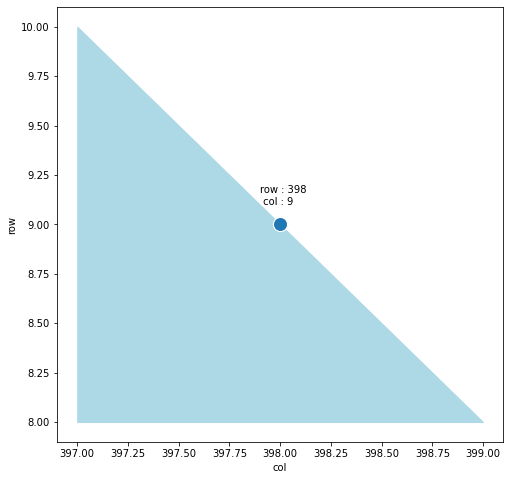

In [19]:
datasetShape(dataset)

.

In [20]:
# display the variables as well as the number of non-zero values

def dataset_variable(df):
    fig, ax = plt.subplots(figsize=(22, 6))
    sns.barplot(x=df.count().index, y= df.count().values)
    for i, v in enumerate(df.count().values):
        ax.annotate(str(v), xy=(i, v), xytext=(0, 3), textcoords="offset points", ha='center')

    plt.plot()

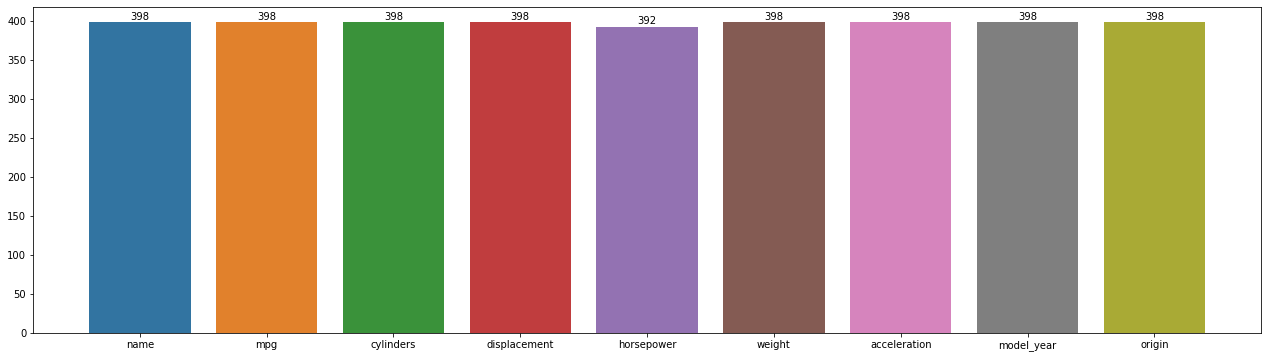

In [21]:
dataset_variable(dataset)

.

In [24]:
# Get the unique values and their frequencies
unique_values = dataset['origin'].value_counts()
unique_values

usa       249
japan      79
europe     70
Name: origin, dtype: int64

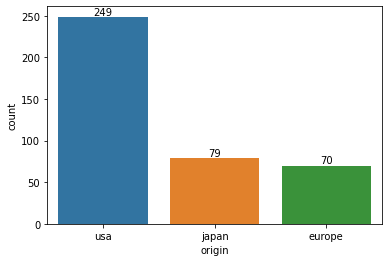

In [28]:
# Create the countplot to display the modalities and see if the dataset is balanced or not
ax = sns.countplot(x='origin', data=dataset)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.show()

.

In [29]:
#show dataset info

def tabulate_func(dataset):

    summary_df = pd.DataFrame({
        "Variable Type": dataset.dtypes,
        "Missing Values": dataset.isna().sum(),
         "Total Values": dataset.count(),
        "unique values":  [dataset[column].unique().shape[0] for column in dataset.columns]

    })
    return summary_df

In [33]:
print(tabulate(tabulate_func(dataset), headers='keys', tablefmt='fancy_grid')) # display info in a formatted table

╒══════════════╤═════════════════╤══════════════════╤════════════════╤═════════════════╕
│              │ Variable Type   │   Missing Values │   Total Values │   unique values │
╞══════════════╪═════════════════╪══════════════════╪════════════════╪═════════════════╡
│ name         │ object          │                0 │            398 │             305 │
├──────────────┼─────────────────┼──────────────────┼────────────────┼─────────────────┤
│ mpg          │ float64         │                0 │            398 │             129 │
├──────────────┼─────────────────┼──────────────────┼────────────────┼─────────────────┤
│ cylinders    │ int64           │                0 │            398 │               5 │
├──────────────┼─────────────────┼──────────────────┼────────────────┼─────────────────┤
│ displacement │ float64         │                0 │            398 │              82 │
├──────────────┼─────────────────┼──────────────────┼────────────────┼─────────────────┤
│ horsepower   │ floa

.

In [34]:
#display and examine the statistical description of the variables in the dataset
dataset.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
count,398.000000,398.000000,398.000000,392.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050
std,7.815984,1.701004,104.269838,38.491160,846.841774,2.757689,3.697627
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000
50%,23.000000,4.000000,148.500000,93.500000,2803.500000,15.500000,76.000000
75%,29.000000,8.000000,262.000000,126.000000,3608.000000,17.175000,79.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000


.

In [36]:
def variable_visual(x_variable, y_variable):
    
    fig, axis = plt.subplots(nrows=3, ncols=2, figsize=(15,15))
    fig.suptitle(f"\n============Visualization and analysis of the variable============\n {x_variable}")
    plt.subplots_adjust(hspace=0.3, wspace=0.3)
    for i in range(3):
        for j in range(2):
            sns.histplot(dataset[x_variable], kde=True, ax= axis[0,0])
            axis[0,0].set_title(x_variable +" "+ "Hitogram" )
            sns.boxplot(data=dataset, x=f'{x_variable}', y = f'{y_variable}',ax= axis[0,1])
            axis[0,1].set_title(x_variable +" "+ "boxplot" )
            sns.boxplot(data = dataset, x=f'{x_variable}', ax= axis[1,0])
            axis[1,0].set_title(x_variable +" "+ "Boxplot" )
            sns.violinplot(data = dataset, x=f'{x_variable}', ax= axis[1,1])
            axis[1,1].set_title(x_variable +" "+ "Violinplot" )
            sns.scatterplot(data = dataset, x=f'{x_variable}', y = f'{y_variable}', ax= axis[2,0])
            axis[2,0].set_title(x_variable +" "+ "scatter plot" )
            sns.lineplot(data = dataset, x=f'{x_variable}', y = f'{y_variable}', ax= axis[2,1])
            axis[2,1].set_title(x_variable +" "+ "lineplot" )
            
    plt.plot()     

In [38]:
dataset.drop(['name'],axis=1, inplace=True)

In [40]:
#Select the variables to analyze

variable_to_visual = [col for col in dataset.columns[:7]]

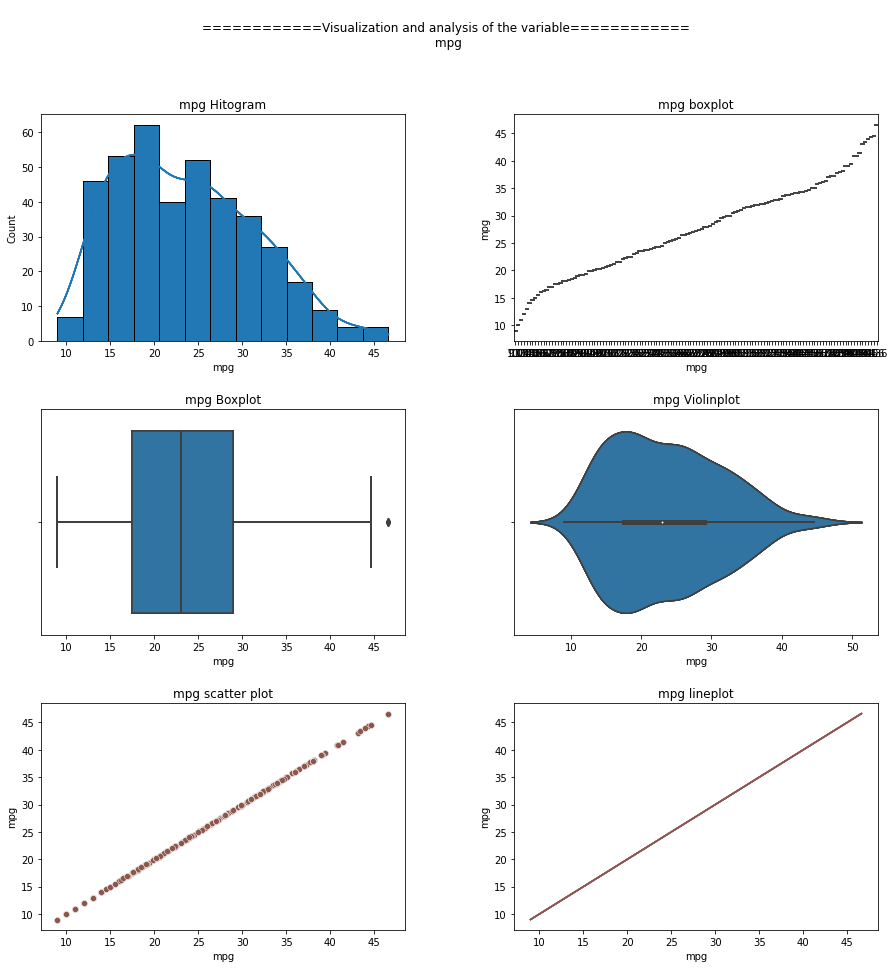

In [41]:
variable_visual(str(variable_to_visual[0]), 'mpg')

.

In [50]:
#there is an outlier after the value 45
dataset.query(f'{variable_to_visual[0]} > 45')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
322,46.6,4,86.0,65.0,2110,17.9,80,japan


.

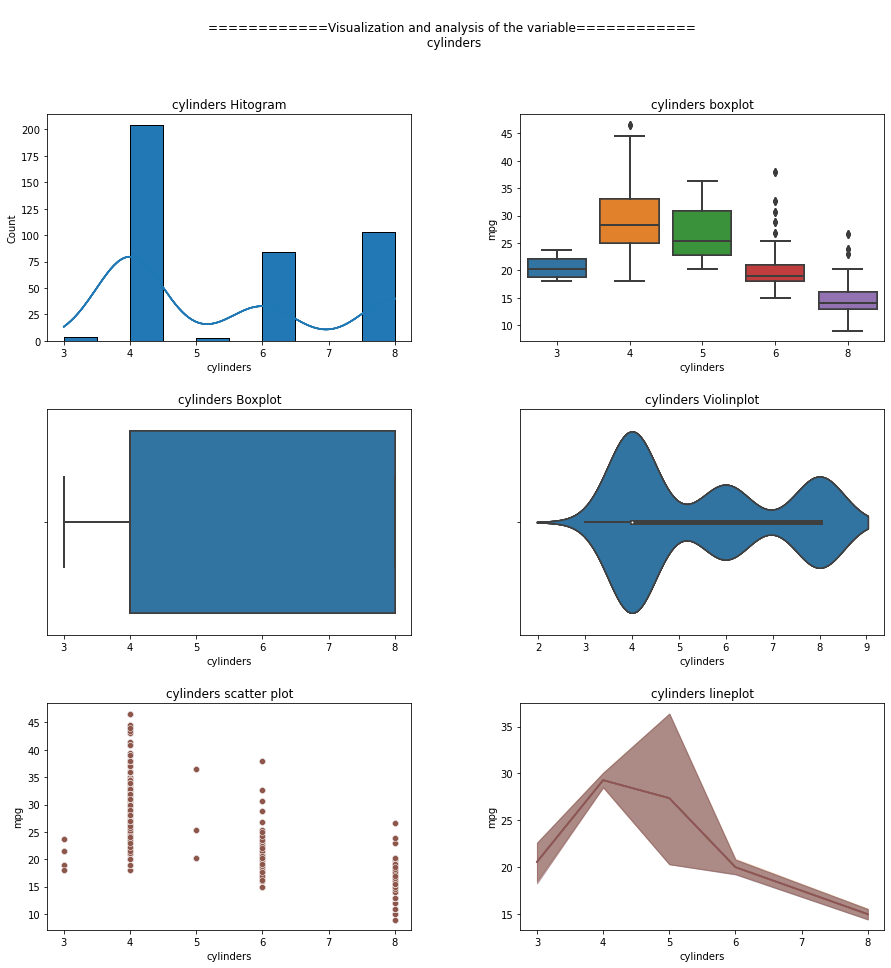

In [42]:
variable_visual(str(variable_to_visual[1]), 'mpg')

.

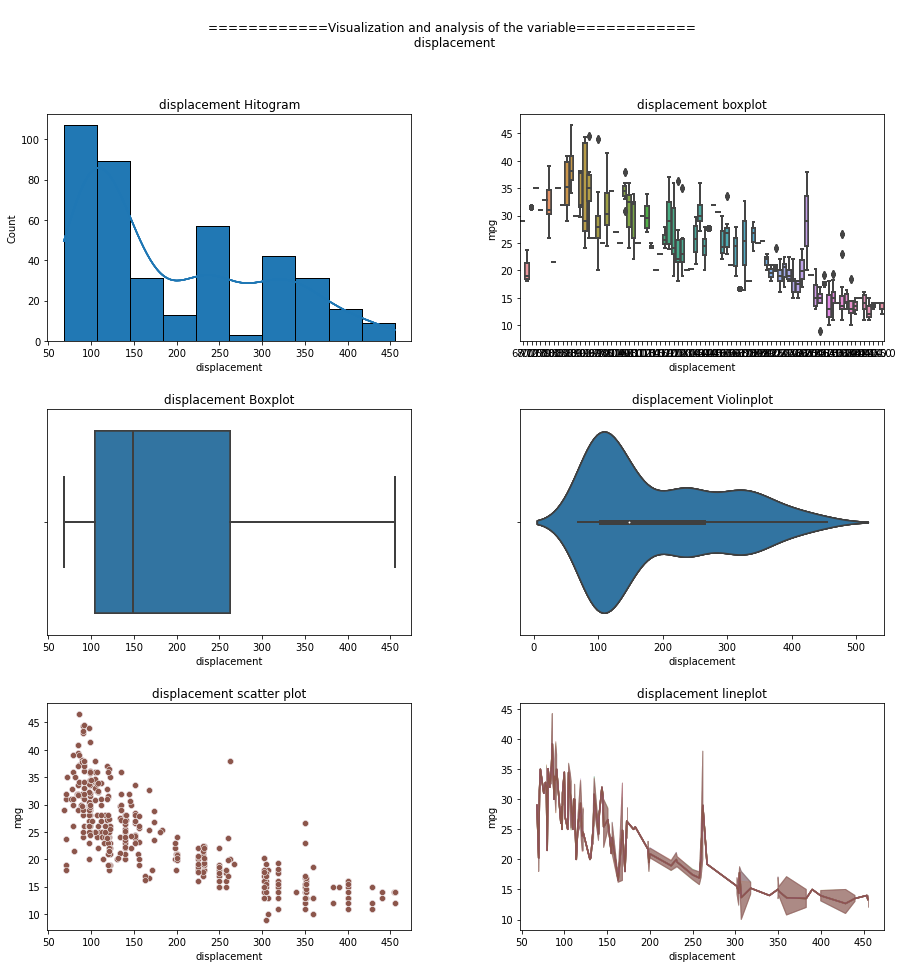

In [43]:
variable_visual(str(variable_to_visual[2]), 'mpg')

.

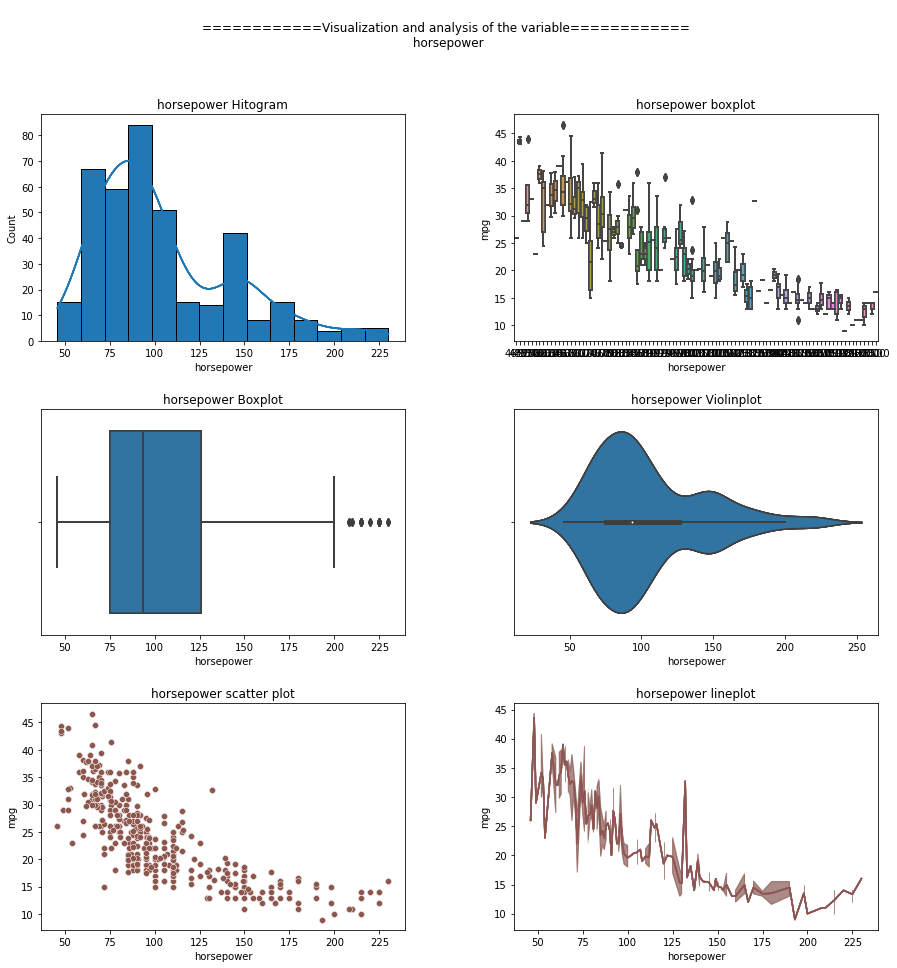

In [44]:
variable_visual(str(variable_to_visual[3]), 'mpg')

.

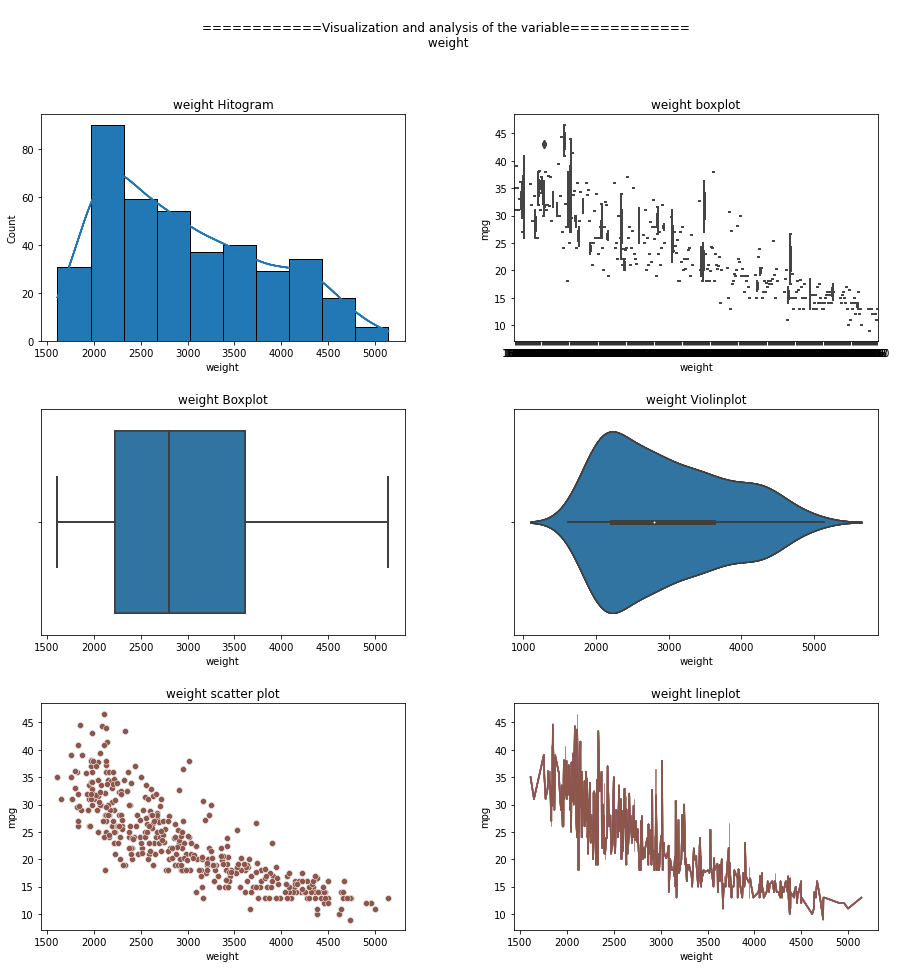

In [45]:
variable_visual(str(variable_to_visual[4]), 'mpg')

.

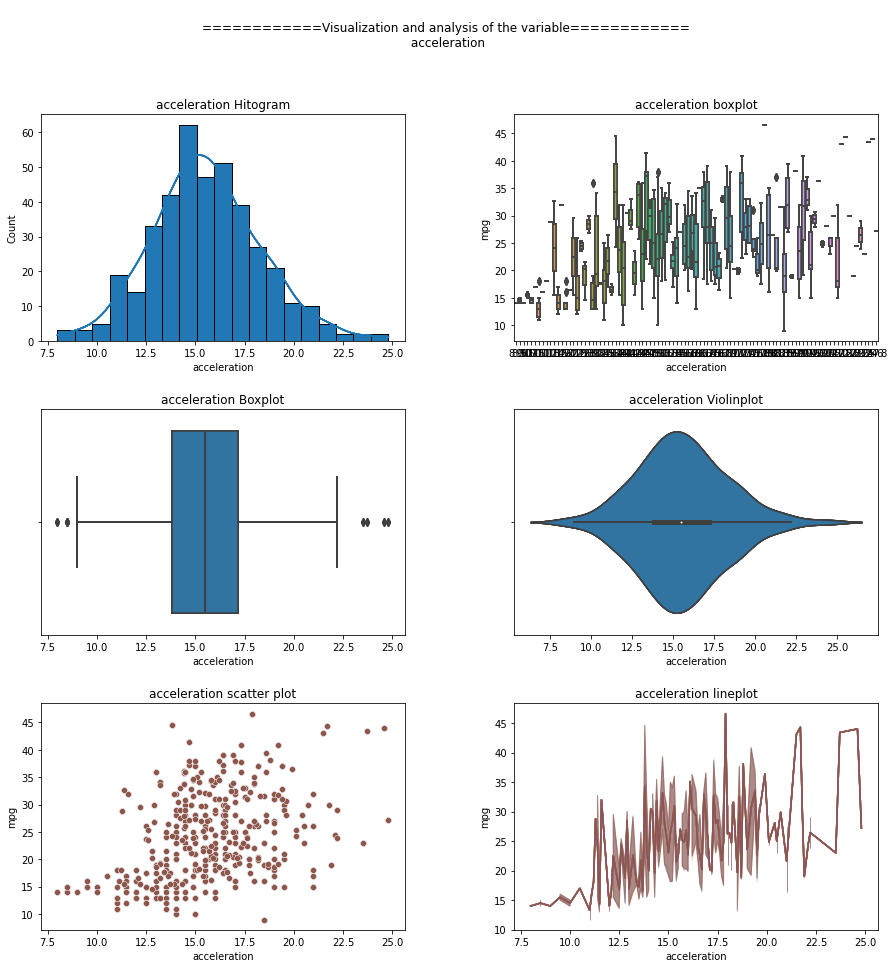

In [46]:
variable_visual(str(variable_to_visual[5]), 'mpg')

.

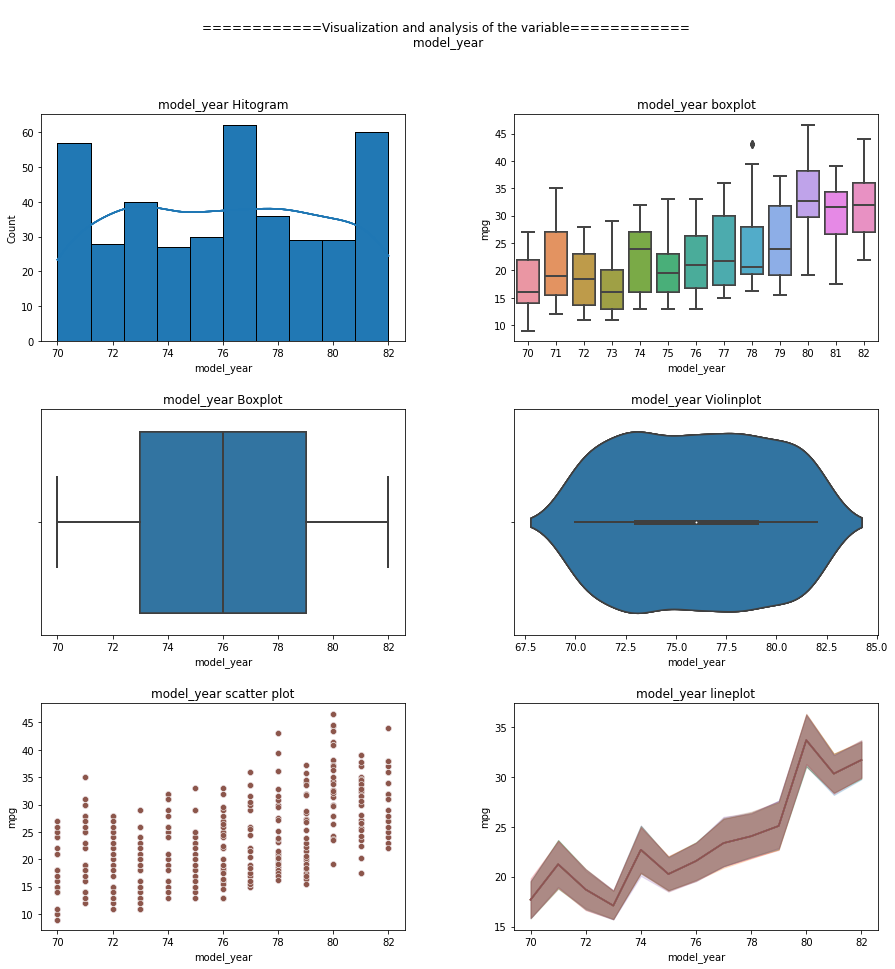

In [47]:
variable_visual(str(variable_to_visual[6]), 'mpg')

.

[]

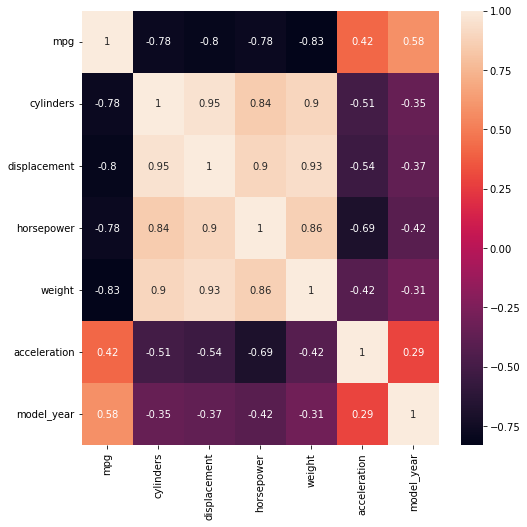

In [49]:
#display the correlation matrix to analyze the relationship between the variables

plt.figure(figsize=(8, 8))
sns.heatmap(dataset.corr(), annot=True)
plt.plot()

.

In [74]:
# Create a label encoder fot "origin" variable
encoder = LabelEncoder()

# Encode the data
encoded_data = encoder.fit_transform(dataset['origin'])

# Add encoded labels to existing column
dataset['origin'] = encoded_data

.

Replace missing values using LinearRegression model to predict missing values


In [75]:
X = dataset.drop(['horsepower'], axis=1)
y= dataset['horsepower']

In [59]:
print(X.shape)
print(y.shape)

(398, 7)
(398,)


In [76]:
X_train_na = X[~np.isnan(y)]
y_train_na = y[~np.isnan(y)]
X_pred_na = X[np.isnan(y)]

model = LinearRegression()
model.fit(X_train_na, y_train_na)

y_pred = model.predict(X_pred_na)

In [ ]:
dataset['horsepower'][np.isnan(dataset['horsepower'])] = y_pred

In [82]:
print(tabulate(tabulate_func(dataset), headers='keys', tablefmt='fancy_grid')) # display info in a formatted table

╒══════════════╤═════════════════╤══════════════════╤════════════════╤═════════════════╕
│              │ Variable Type   │   Missing Values │   Total Values │   unique values │
╞══════════════╪═════════════════╪══════════════════╪════════════════╪═════════════════╡
│ mpg          │ float64         │                0 │            398 │             129 │
├──────────────┼─────────────────┼──────────────────┼────────────────┼─────────────────┤
│ cylinders    │ int64           │                0 │            398 │               5 │
├──────────────┼─────────────────┼──────────────────┼────────────────┼─────────────────┤
│ displacement │ float64         │                0 │            398 │              82 │
├──────────────┼─────────────────┼──────────────────┼────────────────┼─────────────────┤
│ horsepower   │ float64         │                0 │            398 │              99 │
├──────────────┼─────────────────┼──────────────────┼────────────────┼─────────────────┤
│ weight       │ int6

In [83]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
0,18.0,8,307.0,130.0,3504,12.0,70,2
1,15.0,8,350.0,165.0,3693,11.5,70,2
2,18.0,8,318.0,150.0,3436,11.0,70,2
3,16.0,8,304.0,150.0,3433,12.0,70,2
4,17.0,8,302.0,140.0,3449,10.5,70,2


.

In [85]:
#
X = dataset.drop(['mpg'], axis=1)
y = dataset['mpg']

In [88]:
#split the data into test data and train data
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

In [94]:
#instantiate the models to use

models=[
    RandomForestRegressor(),
    AdaBoostRegressor(),
    lgb.LGBMRegressor(),
    LinearRegression()
      
]

In [95]:
# train the models

for model in models:
    model.fit(X_train,y_train)
    print('Model :', type(model).__name__)
    print('Score :',model.score(X_test,y_test))

Model : RandomForestRegressor
Score : 0.9035594898816419
Model : AdaBoostRegressor
Score : 0.8535465922889691
Model : LGBMRegressor
Score : 0.9148063283304033
Model : LinearRegression
Score : 0.834787544047889


In [104]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10]
}

In [105]:
grid_search = GridSearchCV(estimator=RandomForestRegressor(), param_grid=rf_param_grid, cv=5)

In [106]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [107]:
print(grid_search.best_params_)

{'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}


In [108]:
grid_search.score(X_test, y_test)

0.906118035814793

In [109]:
y_pred = grid_search.predict(X_test)

In [111]:
# Calculate performance metrics

rmse = mean_squared_error(y_test, y_pred, squared=False)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

In [112]:
# View performance metrics

print("RMSE:", rmse)
print("MAE:", mae)
print("R²:", r2)

RMSE: 2.246708558425736
MAE: 1.6414384763873582
R²: 0.906118035814793


In [117]:
# Calculate the learning curve

train_sizes, train_scores, val_scores = learning_curve(
    lgb.LGBMRegressor(), X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=5, scoring='neg_mean_squared_error')


.

Gickel OKABI ISSEKE